In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
%reload_ext autoreload

import os
import pandas as pd
import torch
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import repackage
repackage.up()

from modelo_perceptron import *
from modelo_lstm import *
from fluxdataset import *
from utils import *

In [2]:
epochs = 100
learning_rate = 0.001
alpha = 0.5
beta = 0.5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
PATH = "../datos/"
TRAIN_FILE = "exoTrain.csv"

In [4]:
df_train = pd.read_csv(f'{PATH}{TRAIN_FILE}', low_memory=False)
df_train['LABEL'] = df_train['LABEL'].add(-1)
df_train.iloc[:,1:] = reduce_upper_outliers(df_train.iloc[:,1:])
df_train.iloc[:,1:] = df_train.iloc[:,1:].apply(z_score_normalizing, axis = 1)

In [5]:
validation_proportion = 0.2
df_train, df_validation = split_train_df(df_train, validation_proportion)

In [6]:
model_name = os.getcwd() + "\\saved_models\\lstm_sgd_cross"
modelo = ModeloLSTM().to(device)
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(modelo.parameters(), lr = learning_rate)

In [7]:
resultado = train_lstm(modelo, model_name, criterion, optimizer, epochs, alpha, beta, df_train, df_validation, device)

using device cuda
Matriz de confusión:
			Predicciones
Valor real	Negativos	Positivos
Negativos	1010		0
Positivos	7		0

Acierto: 0.9931170344352722 Sensibilidad: 0.0 Especificidad: 1.0 Score: 0.4965585172176361
New model saved
Score 0.4965585172176361 at epoch 0
Epoch: 0 Train loss 0.28201902625162417 Validation loss 0.11648230999708176
Score 0.4965585172176361 at epoch 1
Epoch: 1 Train loss 0.10337432819150882 Validation loss 0.06804365664720535
Score 0.4965585172176361 at epoch 2
Epoch: 2 Train loss 0.07261644985517647 Validation loss 0.05393903702497482
Score 0.4965585172176361 at epoch 3
Epoch: 3 Train loss 0.060788781285578845 Validation loss 0.04795407876372337
Score 0.4965585172176361 at epoch 4
Epoch: 4 Train loss 0.05481507218733467 Validation loss 0.044957760721445084
Score 0.4965585172176361 at epoch 5
Epoch: 5 Train loss 0.05136901371602051 Validation loss 0.04332423955202103
Score 0.4965585172176361 at epoch 6
Epoch: 6 Train loss 0.04921750515626162 Validation loss 0.04237

Score 0.4965585172176361 at epoch 70
Epoch: 70 Train loss 0.043550792373076117 Validation loss 0.042293038219213486
Score 0.4965585172176361 at epoch 71
Epoch: 71 Train loss 0.043547884955160154 Validation loss 0.042293354868888855
Score 0.4965585172176361 at epoch 72
Epoch: 72 Train loss 0.04355053796229257 Validation loss 0.04229546710848808
Score 0.4965585172176361 at epoch 73
Epoch: 73 Train loss 0.04354603489728173 Validation loss 0.04229659214615822
Score 0.4965585172176361 at epoch 74
Epoch: 74 Train loss 0.04355281641207983 Validation loss 0.04229782521724701
Score 0.4965585172176361 at epoch 75
Epoch: 75 Train loss 0.043546517943867304 Validation loss 0.04229893535375595
Score 0.4965585172176361 at epoch 76
Epoch: 76 Train loss 0.043548328577739895 Validation loss 0.04229975864291191
Score 0.4965585172176361 at epoch 77
Epoch: 77 Train loss 0.04354492961921036 Validation loss 0.04229997098445892
Score 0.4965585172176361 at epoch 78
Epoch: 78 Train loss 0.043547504246967135 Val

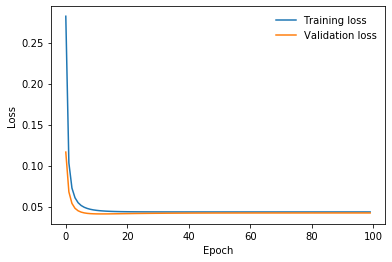

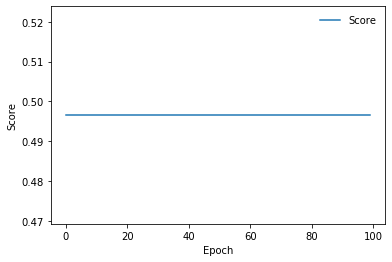

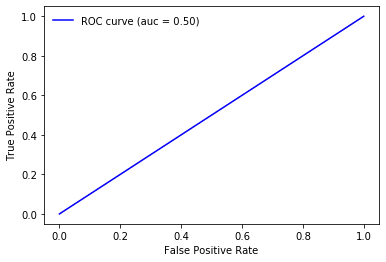

In [8]:
resultado.plot_graphics()

Suavizando la señal

In [9]:
df_train = pd.read_csv(f'{PATH}{TRAIN_FILE}', low_memory=False)
df_train['LABEL'] = df_train['LABEL'].add(-1)
df_train.iloc[:, 1:] = reduce_upper_outliers(df_train.iloc[:, 1:], 0.01)
df_train.iloc[:,1:] = df_train.iloc[:,1:].apply(gaussian_filter, substract = True, axis = 1)
df_train.iloc[:,1:] = df_train.iloc[:,1:].apply(z_score_normalizing, axis = 1)
df_train_x, df_train_y = generate_x_y_df(df_train)
sm = SMOTE()
df_train_x, df_train_y = sm.fit_sample(df_train_x, df_train_y)
df_train = pd.DataFrame(df_train_x)
df_train.insert(0, 'LABEL', df_train_y)

In [10]:
validation_proportion = 0.2
df_train, df_validation = split_train_df(df_train, validation_proportion)

In [11]:
modelo = ModeloLSTM().to(device)
model_name = os.getcwd() + "\\saved_models\\lstm_sgd_cross_diferencia"
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(modelo.parameters(), lr = learning_rate)

In [12]:
resultado = train_lstm(modelo, model_name, criterion, optimizer, epochs, alpha, beta, df_train, df_validation, device)

using device cuda
Matriz de confusión:
			Predicciones
Valor real	Negativos	Positivos
Negativos	0		1010
Positivos	0		1010

Acierto: 0.5 Sensibilidad: 1.0 Especificidad: 0.0 Score: 0.25
New model saved
Score 0.25 at epoch 0
Epoch: 0 Train loss 0.6934107234793725 Validation loss 0.693142294883728
Score 0.25 at epoch 1
Epoch: 1 Train loss 0.6933528775035744 Validation loss 0.6932194232940674
Score 0.25 at epoch 2
Epoch: 2 Train loss 0.6933764090411144 Validation loss 0.6931520104408264
Score 0.25 at epoch 3
Epoch: 3 Train loss 0.6932519126351517 Validation loss 0.6932055354118347
Score 0.25 at epoch 4
Epoch: 4 Train loss 0.69333612256416 Validation loss 0.6932076811790466
Score 0.25 at epoch 5
Epoch: 5 Train loss 0.6933922860660765 Validation loss 0.693132758140564
Score 0.25 at epoch 6
Epoch: 6 Train loss 0.6932860058575574 Validation loss 0.6931644678115845
Score 0.25 at epoch 7
Epoch: 7 Train loss 0.6933494701170095 Validation loss 0.6931650042533875
Score 0.25 at epoch 8
Epoch: 8 Trai

Score 0.25 at epoch 73
Epoch: 73 Train loss 0.6932455849529493 Validation loss 0.6930930614471436
Score 0.25 at epoch 74
Epoch: 74 Train loss 0.6932048931644105 Validation loss 0.693030595779419
Score 0.25 at epoch 75
Epoch: 75 Train loss 0.6931862544674094 Validation loss 0.6931478381156921
Score 0.25 at epoch 76
Epoch: 76 Train loss 0.6931897392957518 Validation loss 0.6929911375045776
Score 0.277969092130661 at epoch 77
Epoch: 77 Train loss 0.6932517893907457 Validation loss 0.6929748058319092
Score 0.25 at epoch 78
Epoch: 78 Train loss 0.6931761223195803 Validation loss 0.693393349647522
Score 0.25 at epoch 79
Epoch: 79 Train loss 0.6931705593989037 Validation loss 0.6929892897605896
Score 0.25 at epoch 80
Epoch: 80 Train loss 0.6930351438498733 Validation loss 0.6933330297470093
Score 0.25 at epoch 81
Epoch: 81 Train loss 0.6932776834852624 Validation loss 0.6930383443832397
Score 0.25497499108314514 at epoch 82
Epoch: 82 Train loss 0.693222870817869 Validation loss 0.692952513694

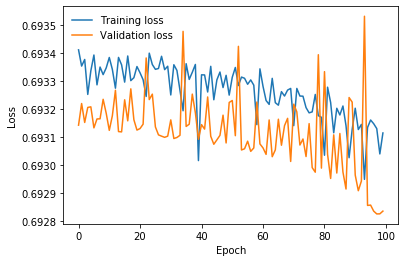

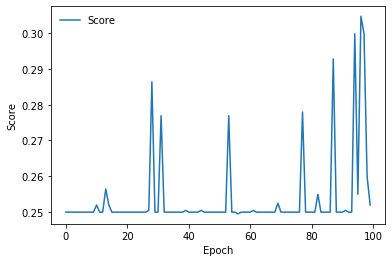

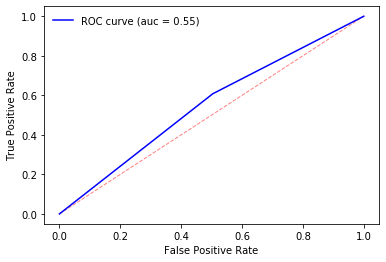

In [13]:
resultado.plot_graphics()

SMOTE

In [14]:
df_train = pd.read_csv(f'{PATH}{TRAIN_FILE}', low_memory=False)
df_train['LABEL'] = df_train['LABEL'].add(-1)
df_train.iloc[:, 1:] = reduce_upper_outliers(df_train.iloc[:, 1:], 0.01)
df_train.iloc[:,1:] = df_train.iloc[:,1:].apply(gaussian_filter, substract = True, axis = 1)
df_train.iloc[:,1:] = df_train.iloc[:,1:].apply(z_score_normalizing, axis = 1)
df_train_x, df_train_y = generate_x_y_df(df_train)
sm = SMOTE()
df_train_x, df_train_y = sm.fit_sample(df_train_x, df_train_y)
df_train = pd.DataFrame(df_train_x)
df_train.insert(0, 'LABEL', df_train_y)

In [15]:
validation_proportion = 0.2
df_train, df_validation = split_train_df(df_train, validation_proportion)

In [16]:
modelo = ModeloLSTM().to(device)
model_name = os.getcwd() + "\\saved_models\\lstm_sgd_cross_smote_diferencia"
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(modelo.parameters(), lr = learning_rate)

In [17]:
resultado = train_lstm(modelo, model_name, criterion, optimizer, epochs, alpha, beta, df_train, df_validation, device)

using device cuda
Matriz de confusión:
			Predicciones
Valor real	Negativos	Positivos
Negativos	0		1010
Positivos	0		1010

Acierto: 0.5 Sensibilidad: 1.0 Especificidad: 0.0 Score: 0.25
New model saved
Score 0.25 at epoch 0
Epoch: 0 Train loss 0.693362829509643 Validation loss 0.693227231502533
Score 0.25 at epoch 1
Epoch: 1 Train loss 0.6933615163706317 Validation loss 0.6932318210601807
Score 0.25 at epoch 2
Epoch: 2 Train loss 0.6933327940357203 Validation loss 0.6931475400924683
Score 0.25 at epoch 3
Epoch: 3 Train loss 0.6933207289933568 Validation loss 0.6932200193405151
Score 0.25 at epoch 4
Epoch: 4 Train loss 0.6933630349760008 Validation loss 0.6931554675102234
Score 0.2495051920413971 at epoch 5
Epoch: 5 Train loss 0.6933420963364072 Validation loss 0.6931463479995728
Score 0.25 at epoch 6
Epoch: 6 Train loss 0.6933623200743505 Validation loss 0.6931827068328857
Score 0.25 at epoch 7
Epoch: 7 Train loss 0.693316669430178 Validation loss 0.6933045983314514
Score 0.25 at epoch 

Score 0.2495051920413971 at epoch 73
Epoch: 73 Train loss 0.6933184256500536 Validation loss 0.6931010484695435
Score 0.2495051920413971 at epoch 74
Epoch: 74 Train loss 0.6933015072404748 Validation loss 0.6931160688400269
Score 0.25 at epoch 75
Epoch: 75 Train loss 0.6932898465580869 Validation loss 0.6931648254394531
Score 0.2495051920413971 at epoch 76
Epoch: 76 Train loss 0.6933087624904543 Validation loss 0.6930997967720032
Score 0.25 at epoch 77
Epoch: 77 Train loss 0.6932699787882295 Validation loss 0.6931662559509277
Score 0.25 at epoch 78
Epoch: 78 Train loss 0.6931960280947757 Validation loss 0.6935217976570129
Score 0.25 at epoch 79
Epoch: 79 Train loss 0.6932944119640506 Validation loss 0.6934000849723816
Score 0.25 at epoch 80
Epoch: 80 Train loss 0.693134820785853 Validation loss 0.6932035088539124
Score 0.25 at epoch 81
Epoch: 81 Train loss 0.693246774877062 Validation loss 0.6932199001312256
Score 0.2635450065135956 at epoch 82
Epoch: 82 Train loss 0.6933477365660785 V

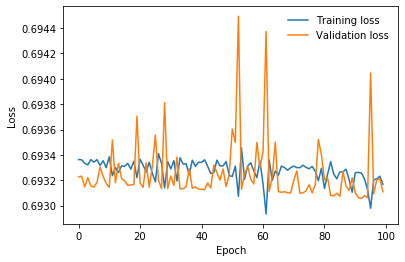

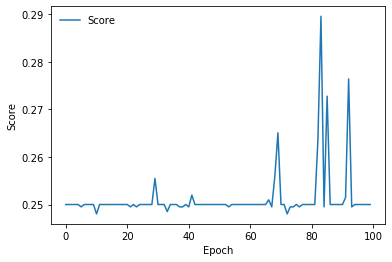

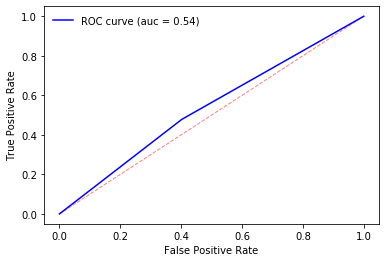

In [18]:
resultado.plot_graphics()